In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### wMAPE calculation

In [2]:
def wMAPE(preds, actuals) -> float:
  """
  wMAPE = weighted MAPE, where the weights are the actuals
  MAPE_i =  (|A_i - P_i|)/A_i)

  wMAPE = weighted average of MAPE where the weights w_i = A_i

  wMAPE = \sum(w_i*MAPE_i)/\sum(w_i)
  wMAPE = \sum(|A_i - P_i|)/\sum(A_i)
  """
  denom = np.sum(actuals)

  num = np.sum(abs(preds-actuals))

  return round(num/denom*100,3)

### Data exploration

In [3]:
data = pd.read_csv('/content/drive/MyDrive/247_Assgn/linear_regression_dataset.csv')

In [4]:
### adding this 1 vector to handle the constant variable 'b'
data['constant'] = 1

In [5]:
data.shape

(2000, 17)

In [6]:
data.head()

,Category_1,Category_2,Ordinal_1,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target,constant
0,B,X,Medium,0.728,4.68000,2.207,-1.5030,1.2380,-2.0940,2.3100,-4.9570,-0.0636,-2.02700,-1.189,3.9940,77.20,1
1,A,Y,Medium,1.187,0.08356,2.771,0.7560,-1.1410,0.9062,0.8450,1.0030,1.6670,-0.08386,-1.844,0.9526,58.78,1
2,B,Y,Low,-4.793,1.85400,1.027,-0.7573,1.8550,0.9785,1.6640,3.8950,-0.3480,-0.18810,-2.540,3.5760,50.00,1
3,B,Y,Medium,-1.512,-0.21910,1.634,-0.3198,0.5930,-0.4540,-0.1495,0.6763,-0.3958,0.70750,3.703,-3.3220,80.44,1
4,NaN,X,High,-0.776,2.61300,0.651,-4.3480,0.0322,0.5073,0.9014,0.2050,2.0000,-2.84600,-0.698,1.6150,47.75,1


In [7]:
data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target,constant
count,1917.000000,1923.000000,1881.000000,1906.000000,1892.000000,1903.000000,1898.000000,1908.000000,1914.000000,1916.000000,1895.000000,1901.000000,2000.000000,2000.0
mean,0.343145,0.356578,0.119760,0.184659,0.316897,0.081237,0.974342,0.762045,0.777979,0.252236,0.299347,0.745607,45.453025,1.0
std,2.544353,2.555801,1.697388,2.039606,1.436178,2.683698,0.918792,2.424669,1.084848,2.374187,2.794408,2.775212,49.283451,0.0
min,-8.060000,-8.690000,-4.883000,-7.113000,-4.370000,-9.010000,-2.348000,-8.200000,-3.320000,-7.594000,-9.110000,-8.260000,-134.400000,1.0
25%,-1.453000,-1.342000,-1.023000,-1.169750,-0.687500,-1.667000,0.370925,-0.843900,0.063992,-1.353000,-1.564250,-1.148000,11.845000,1.0
50%,0.345500,0.341800,0.107500,0.223200,0.316650,0.086850,0.981700,0.722850,0.797000,0.254350,0.318800,0.744600,46.640000,1.0
75%,1.998000,2.072000,1.191000,1.551500,1.302750,1.811500,1.601750,2.395250,1.500000,1.897250,2.149000,2.629000,78.212500,1.0
max,9.050000,8.960000,7.875000,7.470000,5.574000,8.664000,4.004000,8.625000,4.453000,7.510000,9.070000,11.150000,201.900000,1.0


<ipython-input-8-742591b16696>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

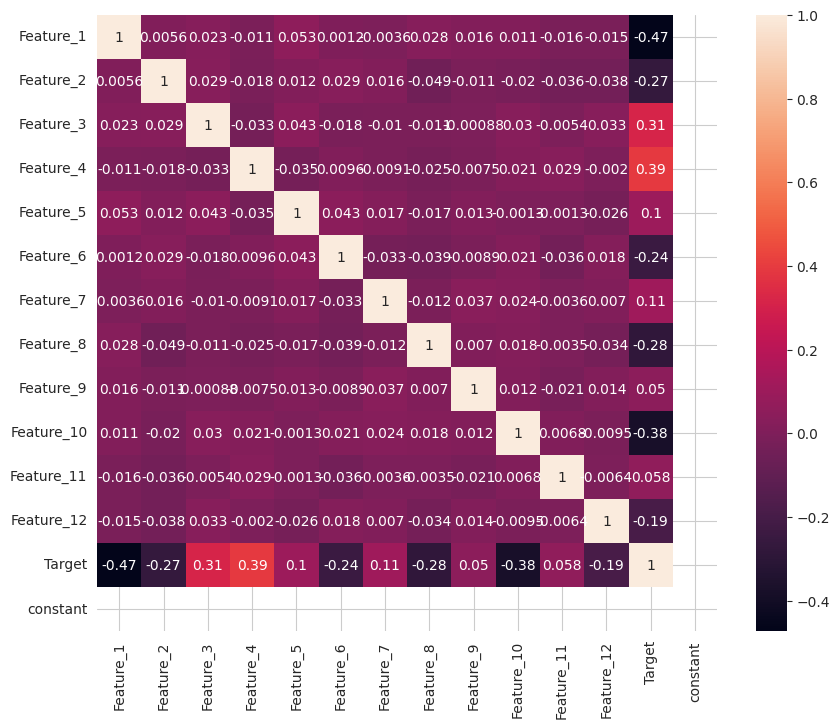

In [8]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

We can see the Target variable is significantly correlated with Feature_{1, 3, 4, 10}

In [9]:
data['Category_1'].value_counts(), data['Category_1'].value_counts(normalize = True)

(B    668
 A    616
 C    600
 Name: Category_1, dtype: int64,
 B    0.354565
 A    0.326964
 C    0.318471
 Name: Category_1, dtype: float64)

In [10]:
data['Category_2'].value_counts(), data['Category_2'].value_counts(normalize = True)

(X    970
 Y    929
 Name: Category_2, dtype: int64,
 X    0.510795
 Y    0.489205
 Name: Category_2, dtype: float64)

In [11]:
data['Ordinal_1'].value_counts(), data['Ordinal_1'].value_counts(normalize = True)

(Low       768
 Medium    735
 High      407
 Name: Ordinal_1, dtype: int64,
 Low       0.402094
 Medium    0.384817
 High      0.213089
 Name: Ordinal_1, dtype: float64)

<Axes: >

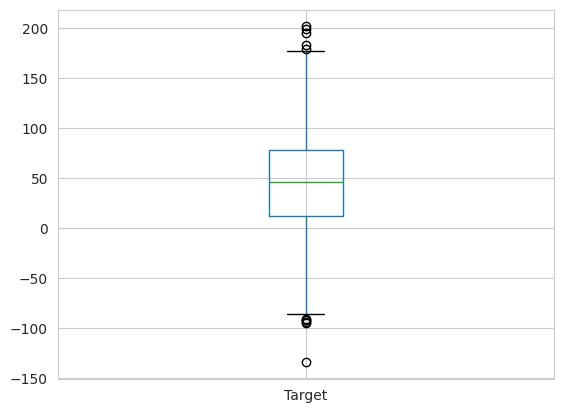

In [12]:
data[['Target']].boxplot()

<Axes: >

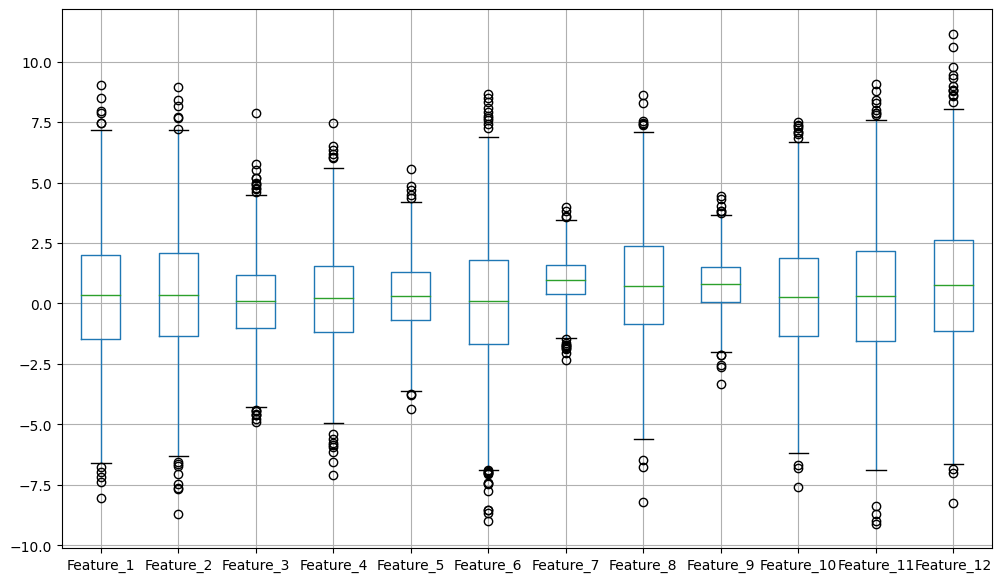

In [ ]:
fig = plt.figure(figsize = (12,7))
data[[f for f in data.columns if "Feature" in f]].boxplot()

In [ ]:
print ('count of NaNs per feature')
for col in data.columns:
  print (col, ' | ', data[col].isna().sum(), f' | {round(data[col].isna().sum()/data.shape[0]*100,3)}%')

count of NaNs per feature
Category_1  |  116  | 5.8%
Category_2  |  101  | 5.05%
Ordinal_1  |  90  | 4.5%
Feature_1  |  83  | 4.15%
Feature_2  |  77  | 3.85%
Feature_3  |  119  | 5.95%
Feature_4  |  94  | 4.7%
Feature_5  |  108  | 5.4%
Feature_6  |  97  | 4.85%
Feature_7  |  102  | 5.1%
Feature_8  |  92  | 4.6%
Feature_9  |  86  | 4.3%
Feature_10  |  84  | 4.2%
Feature_11  |  105  | 5.25%
Feature_12  |  99  | 4.95%
Target  |  0  | 0.0%


### Data Preparation

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2, random_state = 19)

### Tried imputation followed by one hot encoding for the one hot variables but the results do not look promising

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

si_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_data_train = pd.DataFrame(si_imputer.fit_transform(df_train), columns = data.columns)
imputed_data_test = pd.DataFrame(si_imputer.transform(df_test), columns = data.columns)

categorical_columns = ['Category_1', 'Category_2', 'Ordinal_1']

# Use pandas get_dummies to perform one-hot encoding
df_encoded_train = pd.get_dummies(imputed_data_train, columns=categorical_columns)
df_encoded_test = pd.get_dummies(imputed_data_test, columns=categorical_columns)

In [ ]:


features = [f for f in df_encoded_train.columns if f != 'Target']

X_train = np.array(df_encoded_train[features].astype(float))
y_train = np.array(df_encoded_train['Target'].astype(float))
w_star = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train

X_test = np.array(df_encoded_test[features])
y_test = np.array(df_encoded_test['Target'])

predictions_train = X_train@w_star
predictions_test = X_test@w_star

print ("Report ----- ")
print ("Train stats --- ")
print (f"--- MSE = {np.mean((predictions_train - y_train)**2)}")
print (f"--- wMAPE = {wMAPE(predictions_train, y_train)}%")

print ("Test stats --- ")
print (f"--- MSE = {np.mean((predictions_test - y_test)**2)}")
print (f"--- wMAPE = {wMAPE(predictions_test, y_test)}%")

Report ----- 
Train stats --- 
--- MSE = 55641.792882867114
--- wMAPE = 420.78%
Test stats --- 
--- MSE = 53286.326222297976
--- wMAPE = 396.013%


### Ordinal encoding followed by imputation using KNN imputer

In [6]:
#ordinal encoding followed by imputation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer


# Define the ordinal mapping for categorical features
ordinal_mapping = {
    'Category_2': {'X': 1, 'Y': 2},
    'Category_1': {'A': 1, 'B': 2, 'C': 3},
    'Ordinal_1': {'Low':1, 'Medium':2, 'High':3}
}

# Create an OrdinalEncoder instance with custom mappings
encoder = OrdinalEncoder(categories=[list(ordinal_mapping['Category_1'].keys()),
                                      list(ordinal_mapping['Category_2'].keys()), list(ordinal_mapping['Ordinal_1'].keys())],
                         handle_unknown = 'use_encoded_value', unknown_value = np.nan)

# Apply the ordinal encoding to the selected columns
df_train[['Category_1_ord', 'Category_2_ord', "Ordinal_1_ord"]] = encoder.fit_transform(df_train[['Category_1', 'Category_2', "Ordinal_1"]])
df_test[['Category_1_ord', 'Category_2_ord', "Ordinal_1_ord"]] = encoder.transform(df_test[['Category_1', 'Category_2', "Ordinal_1"]])

columns_reqd = [f for f in df_train.columns if ("Feat" in f or "_ord" in f)]+['constant']+['Target']

df_train_ = df_train[columns_reqd]
df_test_ = df_test[columns_reqd]

knn_imputer = KNNImputer(n_neighbors=5)
# si_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data_train = pd.DataFrame(knn_imputer.fit_transform(df_train_), columns = df_train_.columns)
imputed_data_test = pd.DataFrame(knn_imputer.transform(df_test_), columns = df_test_.columns)

In [ ]:
imputed_data_train

In [7]:

features = [f for f in imputed_data_train.columns if ("Feat" in f or "_ord" in f)]+['constant']

X_train = np.array(imputed_data_train[features].astype(float))
y_train = np.array(imputed_data_train['Target'].astype(float))
w_star = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train

X_test = np.array(imputed_data_test[features].astype(float))
y_test = np.array(imputed_data_test['Target'].astype(float))

predictions_train = X_train@w_star
predictions_test = X_test@w_star

print ("Report ----- ")
print ("Train stats --- ")
print (f"--- MSE = {np.mean((predictions_train - y_train)**2)}")
print (f"--- wMAPE = {wMAPE(predictions_train, y_train)}%")

print ("Test stats --- ")
print (f"--- MSE = {np.mean((predictions_test - y_test)**2)}")
print (f"--- wMAPE = {wMAPE(predictions_test, y_test)}%")

Report ----- 
Train stats --- 
--- MSE = 176.82444659297437
--- wMAPE = 22.963%
Test stats --- 
--- MSE = 190.69145555226237
--- wMAPE = 22.557%


### The optimal results using a closed form solution for regression we obtain --

Train stats ---

--- MSE = 176.82444659297437

--- wMAPE = 22.963%

Test stats ---

--- MSE = 190.69145555226237

--- wMAPE = 22.557%

Text(0.5, 1.0, 'Test predictions plot | MSE = 161.86 | wMAPE = 22.288%')

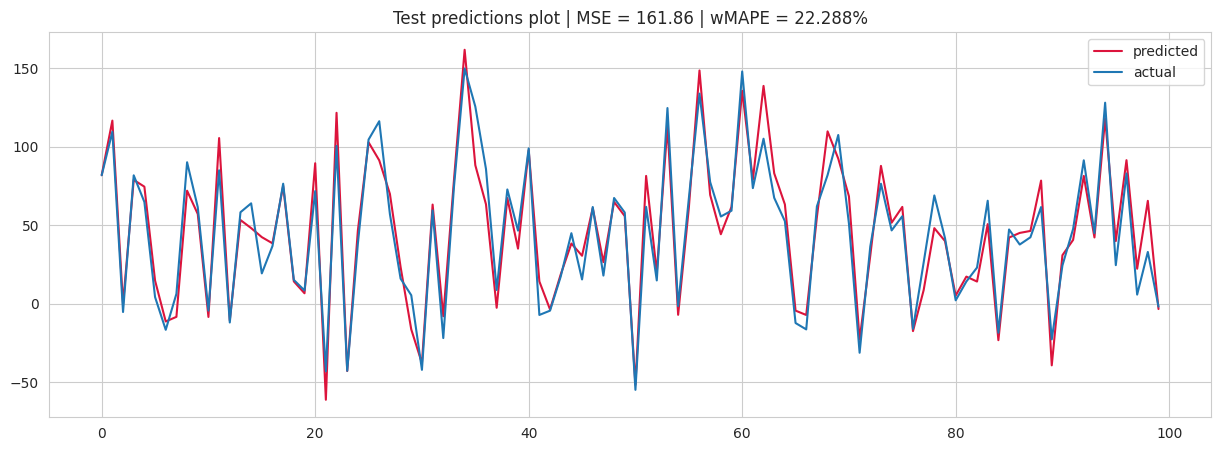

In [18]:
start_indx = 0
end_indx = 100
plt.figure(figsize = (15,5))
plt.plot(range(start_indx, end_indx), predictions_test[start_indx:end_indx], color='crimson', label = 'predicted')
plt.plot(range(start_indx, end_indx), y_test[start_indx:end_indx], label = 'actual')
plt.legend()
s = f"Test predictions plot | MSE = {round(np.mean((predictions_test[start_indx:end_indx] -  y_test[start_indx:end_indx])**2),2)} | wMAPE = {wMAPE(predictions_test[start_indx:end_indx],y_test[start_indx:end_indx])}%"
plt.title(s)

### the optimal w_star is printed below, along with the constant 'b'

In [19]:
for feat,weight in zip(features, w_star):
  print (feat,'--',weight)

Feature_1 -- -9.126036725312083
Feature_2 -- -5.3739672117325865
Feature_3 -- 9.803816543607397
Feature_4 -- 9.54708297563294
Feature_5 -- 3.7268810933645153
Feature_6 -- -4.171377154443499
Feature_7 -- 5.4172475175273345
Feature_8 -- -5.3186629453105105
Feature_9 -- 3.060326950513735
Feature_10 -- -7.962547025439482
Feature_11 -- 0.5107606240594771
Feature_12 -- -3.894942626355782
Category_1_ord -- 7.767640026024173
Category_2_ord -- -9.886960281658693
Ordinal_1_ord -- 1.0731973557441132
constant -- 44.129683333582705


### Implementing Gradient Descent algorithm for solving the same regression problem

$L(w) = (Xw-y)^T(Xw-y)$

$w^{t+1} = w^{t} - \eta[\nabla L(w)]_{w = w^{t}}$

$\nabla L(w) = \frac{\partial L(w)}{\partial w} = \frac{\partial (w^TX^TXw - 2w^TX^Ty + y^Ty)}{\partial w} = 2(X^TXw - X^Ty)$

$\implies w^{t+1} = w^{t} - 2\eta(X^TXw^{t} - X^Ty)$

Now, when we use full data for computing the gradient descent it is a full gradient descent algorithm, but if we use single data point for updating the weights, it is called stochastic gradient descent.


In [24]:
#implementing gradient descent

def compute_batch_gradient(X_train_minibatch, y_train_minibatch, w_prev):
  """
  Assuming batch is a matrix of rows of size |B|xn
  n --> number of features
  """
  X_TX = X_train_minibatch.T@X_train_minibatch
  X_Ty = X_train_minibatch.T@y_train_minibatch
  gradient = 2*(X_TX@w_prev-X_Ty)

  return (1/X_train_minibatch.shape[0])*gradient

def create_batches(total_len : int, batch_size : int):
  """
  returns batchwise indices
  """

  num_batches = total_len//batch_size
  batches = np.array_split(range(total_len), num_batches) #this is a list of indices of all the batches
  return batches

def update_w(w_prev, gradient, lr = 0.01):
  return w_prev - lr*gradient


def train(X_train, y_train, X_test, y_test, batch_size_k = 2, num_epochs = 1, learning_rate = 0.01, stop_training_threshold = 5):

  w = np.zeros(X_train.shape[1]) #started with zero initialization of weights

  w_list = [w]

  MSE_train, wMAPE_train_list = [], []
  MSE_test, wMAPE_test_list = [], []

  batches = create_batches(X_train.shape[0], batch_size_k)

  prev_mse = 1

  for ep in range(num_epochs):
    for batch in batches:

      gradient = compute_batch_gradient(X_train[batch], y_train[batch], w)
      w = update_w(w, gradient, lr = learning_rate)
      w_list.append(w)

      #Loss computation and storing
      train_loss = np.mean((y_train - X_train@w)**2)
      test_loss = np.mean((y_test - X_test@w)**2)

      MSE_train.append(train_loss)
      MSE_test.append(test_loss)

      #wMAPE calculation
      wMAPE_train = wMAPE(X_train@w, y_train)
      wMAPE_test = wMAPE(X_test@w, y_test)

      wMAPE_train_list.append(wMAPE_train)
      wMAPE_test_list.append(wMAPE_test)

    if (abs(MSE_train[-1]-prev_mse) < 1e-4):
      print (MSE_train[-1], prev_mse)
      count_since_no_change += 1
    else:
      count_since_no_change = 0

    if (count_since_no_change > stop_training_threshold):
      print (f"Stopping the training as no significant change in the MSE since last {stop_training_threshold} epochs.")
      break

    prev_mse = MSE_train[-1]

    print (f"Epoch -- {ep} | Train MSE = {train_loss} | Test MSE = {test_loss} | Train wMAPE = {wMAPE_train} | Test_wMAPE = {wMAPE_test}")

  return MSE_train, MSE_test, wMAPE_train_list, wMAPE_test_list, w_list







### define the hyperparas and run the train function

In [ ]:
X_train = np.array(imputed_data_train[features])
y_train = np.array(imputed_data_train['Target'])

X_test = np.array(imputed_data_test[features])
y_test = np.array(imputed_data_test['Target'])

batch_size_k = 8 #stochastic gradient descent
num_epochs = 1000
learning_rate = 1e-3

MSE_train, MSE_test, wMAPE_train_list, wMAPE_test_list, w_list = train(X_train, y_train, X_test, y_test,
                                                                       batch_size_k = batch_size_k,
                                                                       num_epochs = num_epochs,
                                                                       learning_rate = learning_rate)


Text(0.5, 1.0, 'Zoomed in loss curve for batch size = 1')

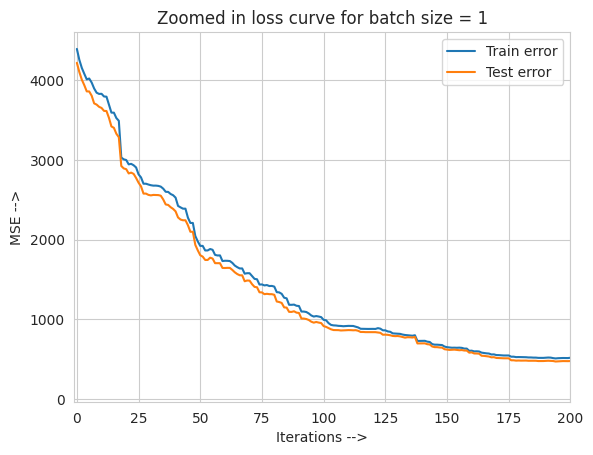

In [39]:
plt.plot(range(len(MSE_train)), MSE_train, label = 'Train error')
plt.plot(range(len(MSE_test)), MSE_test, label = 'Test error')

plt.xlabel('Iterations -->')
plt.ylabel('MSE -->')
plt.legend()
plt.xlim(-1,200)
plt.title(f"Zoomed in loss curve for batch size = {batch_size_k}")

Text(0.5, 1.0, 'Zoomed in loss curve for batch size = 8')

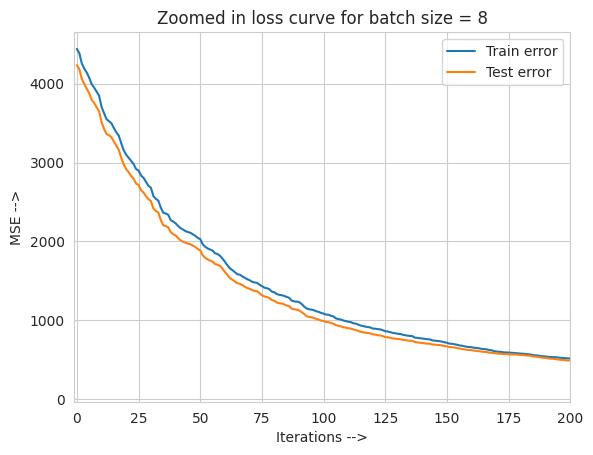

In [43]:
plt.plot(range(len(MSE_train)), MSE_train, label = 'Train error')
plt.plot(range(len(MSE_test)), MSE_test, label = 'Test error')

plt.xlabel('Iterations -->')
plt.ylabel('MSE -->')
plt.legend()
plt.xlim(-1,200)
plt.title(f"Zoomed in loss curve for batch size = {batch_size_k}")

Text(0.5, 1.0, 'Zoomed in loss curve for batch size = 32')

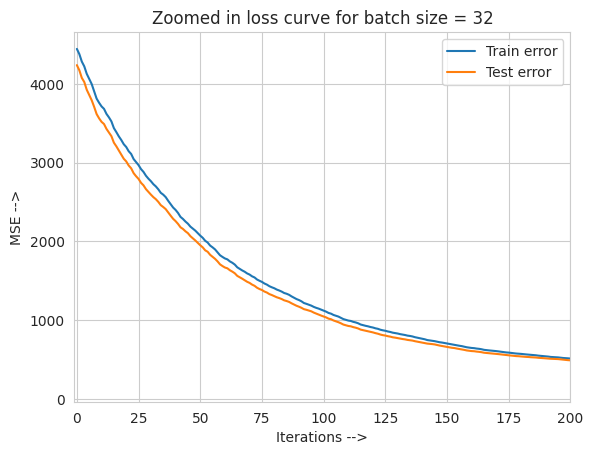

In [41]:
plt.plot(range(len(MSE_train)), MSE_train, label = 'Train error')
plt.plot(range(len(MSE_test)), MSE_test, label = 'Test error')

plt.xlabel('Iterations -->')
plt.ylabel('MSE -->')
plt.legend()
plt.xlim(-1,200)
plt.title(f"Zoomed in loss curve for batch size = {batch_size_k}")

For the reduced the batch size we see a lot of oscillations in the initial parts of the curve, but as we go on increasing the batch size the curve starts becoming smooth, and for batch size = training_data_size it should result in the actual loss curve.

### When to stop the optimization process -

There are two criterion to stop the training -

1. If there is no significant change in the training MSE loss in consecutive $e$ number of epochs, then we terminate the training under the assumption that the model has possibly stuck in a local minima. In such scenarios we can try tuning the learning_rate to achieve a different solution and avoid this situation.

2. If the gap between train_MSE and test_MSE starts to increase, i.e., if the test_MSE in consecutive epochs is not decreasing or increasing, then we can stop the training.

### Plot showcasing how the weights $w^{t}$ after every epoch are approaching the optimal $w^{*}$

Text(0.5, 0, 'Epochs -->')

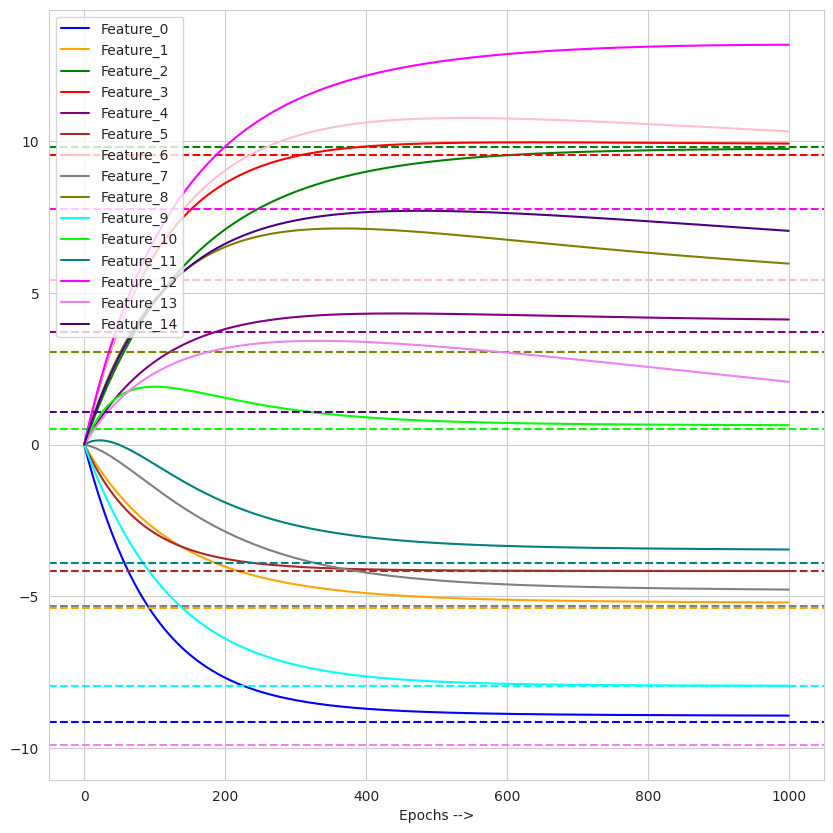

In [13]:
w_array = np.array(w_list)
w_array.shape
plt.figure(figsize = (10,10))
default_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'teal', 'magenta', 'violet', 'indigo']

for i in range(15):
  plt.plot(range(w_array.shape[0]), w_array[:,i], color = default_colors[i], label = f'Feature_{i}')
  plt.axhline(y=w_star[i], color=default_colors[i], linestyle='--')

plt.legend()
plt.xlabel('Epochs -->')


### If we use L2 regularization --

$L(w) = (Xw-y)^T(Xw-y) + \lambda||w||^2$

$w^{t+1} = w^{t} - \eta[\nabla L(w)]_{w = w^{t}}$

$\nabla L(w) = \frac{\partial L(w)}{\partial w} = \frac{\partial (w^TX^TXw - 2w^TX^Ty + y^Ty + \lambda w^Tw)}{\partial w} = 2(X^TXw - X^Ty+\lambda w)$

$\implies w^{t+1} = w^{t} - 2\eta(X^TXw^{t} - X^Ty + \lambda w^{t})$

$\implies w^{t+1} = w^{t} - [\nabla]_{without L2} - 2\eta\lambda w^{t}$

This is the weight decay that is happening if we add an L2 regularizer, we slightly reduce the freedom on $w$ and does not allow it grow rapidly.


